# Computer Vision 

## Convert to gray scale 

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [192]:
image=mpimg.imread("Capture.JPG")

In [193]:
image.shape

(296, 286, 3)

In [194]:
gray_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

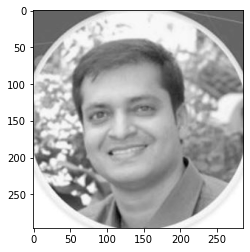

In [195]:
plt.imshow(gray_image,cmap='gray')

## Find out pixel of any point in an image

In [38]:
x=190
y=350
print(gray_image[y,x])

106


## Create smiley from raw matrix

In [29]:
tiny_image = np.array([[0, 0, 0, 0, 0],
                      [0, 255, 0, 255, 0],
                      [0, 0, 0, 0, 0],
                      [0, 255, 255, 255, 0],
                      [0, 0, 0, 0, 0]])

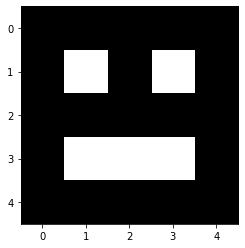

In [32]:
plt.imshow(tiny_image,cmap='gray')

## Fetch RGB pictures

In [39]:
road_image=mpimg.imread("wa_state_highway.jpg")

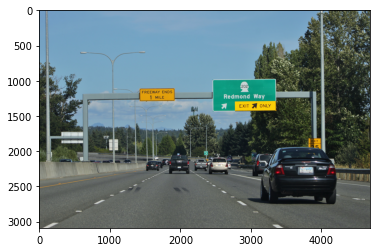

In [40]:
plt.imshow(road_image)

In [44]:
r=road_image[:,:,0]
g=road_image[:,:,1]
b=road_image[:,:,2]

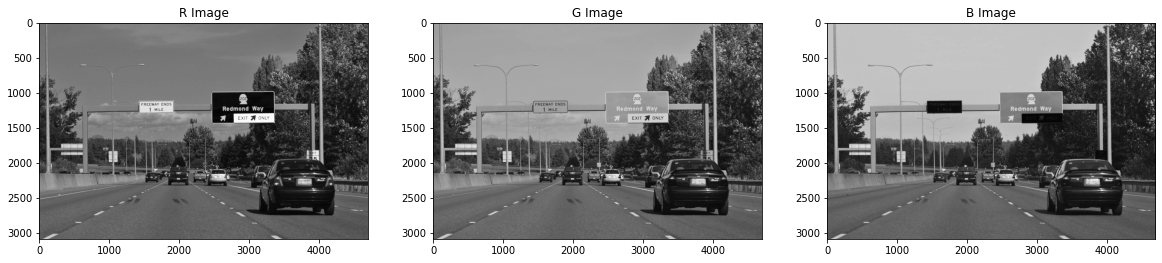

In [62]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,40))
ax1.set_title("R Image")
ax1.imshow(r,cmap='gray')
ax2.set_title("G Image")
ax2.imshow(g,cmap="gray")
ax3.set_title("B Image")
ax3.imshow(b,cmap="gray")

## Changing background 

In [97]:
pizza=cv2.imread("pizza_bluescreen.jpg")

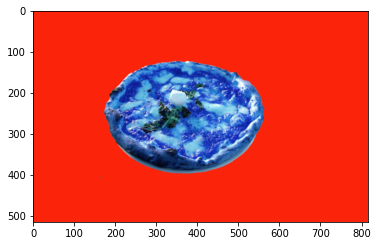

In [98]:
plt.imshow(pizza) ## cv2 reads file as BGR so need to convert to RGB

In [99]:
pizza=cv2.cvtColor(pizza,cv2.COLOR_BGR2RGB)

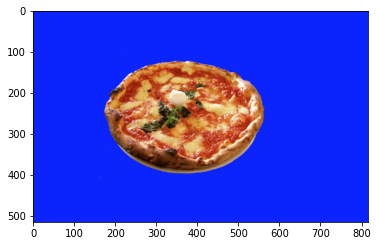

In [100]:
plt.imshow(pizza)

In [101]:
pizza.shape

(514, 816, 3)

In [102]:
lower_blue=np.array([0,0,220])
higher_blue=np.array([50,50,255])

In [103]:
mask=cv2.inRange(pizza,lower_blue,higher_blue)

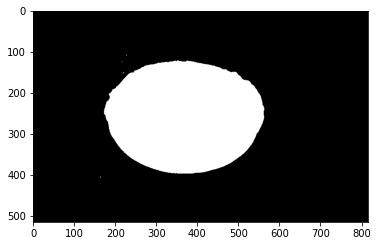

In [122]:
plt.imshow(mask==0,cmap="gray")

In [105]:
pizza[mask!=0]=[0,0,0]

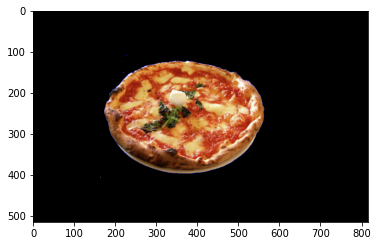

In [106]:
plt.imshow(pizza,cmap="gray")

### Use some other background

In [107]:
bck_image=cv2.imread("space_background.jpg")

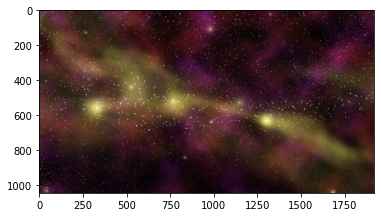

In [108]:
plt.imshow(bck_image)

In [109]:
bck_image=bck_image[:514,:816]

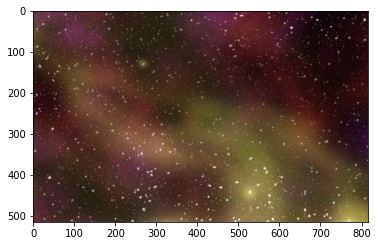

In [110]:
plt.imshow(bck_image)

In [114]:
bck_image[mask==0]=[0,0,0]

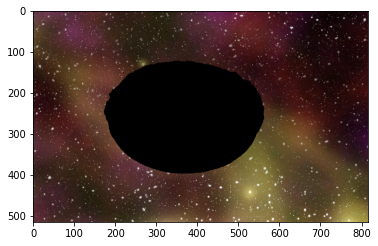

In [115]:
plt.imshow(bck_image)

In [117]:
final_image=pizza+bck_image

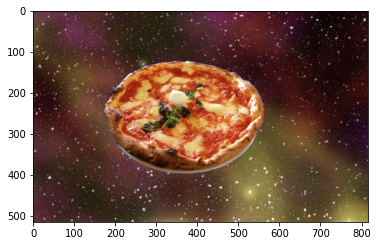

In [118]:
plt.imshow(final_image)

## Using HSV instead of RGB to pick pink balloons

In [123]:
balloons=mpimg.imread("water_balloons.jpg")

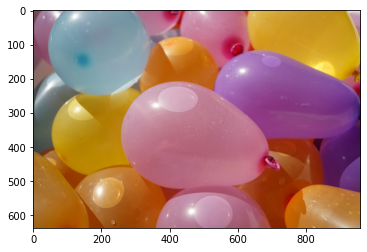

In [127]:
plt.imshow(balloons)

In [128]:
hsv=cv2.cvtColor(balloons,cv2.COLOR_RGB2HSV)

In [129]:
h=hsv[:,:,0]
s=hsv[:,:,1]
v=hsv[:,:,2]

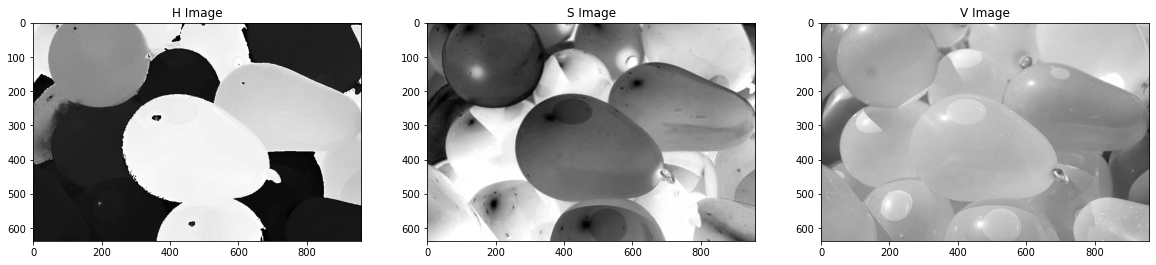

In [136]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,30))
ax1.set_title("H Image")
ax1.imshow(h,cmap='gray')
ax2.set_title("S Image")
ax2.imshow(s,cmap='gray')
ax3.set_title("V Image")
ax3.imshow(v,cmap='gray')

In [151]:
hsv_copy=np.copy(hsv)

In [152]:
lower_value=np.array([160,0,0])
upper_value=np.array([180,255,255])

In [153]:
mask=cv2.inRange(hsv_copy,lower_value,upper_value)

In [154]:
hsv_copy_2=np.copy(hsv_copy)

In [155]:
hsv_copy_2[mask==0]=[0,0,0]

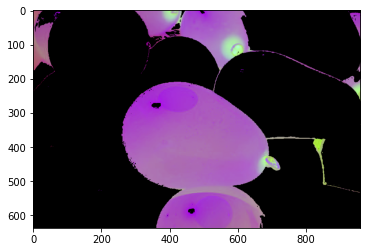

In [156]:
plt.imshow(hsv_copy_2)

## Analysis of FFT over images

In [163]:
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

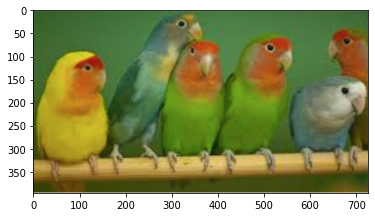

In [171]:
birds=mpimg.imread("birds.jpg")
plt.imshow(birds)

In [166]:
birds_gray=cv2.cvtColor(birds,cv2.COLOR_RGB2GRAY)

In [167]:
birds_scaled=birds_gray/255.0

plt.imshow(ft_image(birds_scaled),cmap="gray")

## Kernels/Filters

### Averaging Filter (Make the picture blur)

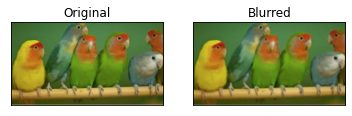

In [180]:
blur = cv2.blur(birds,(5,5))

plt.subplot(121),plt.imshow(birds),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Gaussian Filter

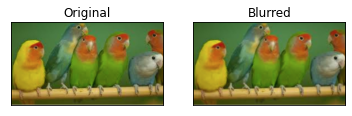

In [181]:
blur = cv2.GaussianBlur(birds,(5,5),0)

plt.subplot(121),plt.imshow(birds),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Median Filter (Applied when original image has 50% noise)

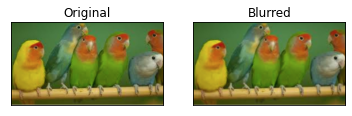

In [182]:
median = cv2.medianBlur(birds,5)

plt.subplot(121),plt.imshow(birds),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Bilateral Filter (Preserves edges)

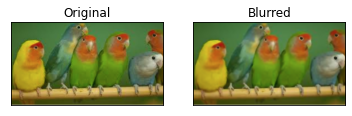

In [183]:
blur = cv2.bilateralFilter(birds,9,75,75)

plt.subplot(121),plt.imshow(birds),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Sobel filter/Edge detection custom filter

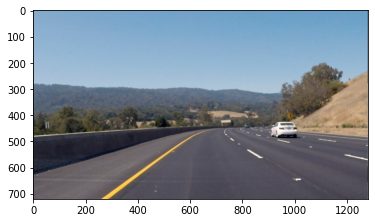

In [185]:
curved_lane=mpimg.imread("curved_lane.jpg")
plt.imshow(curved_lane)

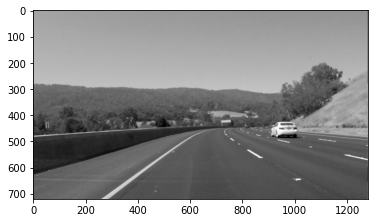

In [187]:
curved_lane_grayscale=cv2.cvtColor(curved_lane,cv2.COLOR_RGB2GRAY)
plt.imshow(curved_lane_grayscale,cmap="gray")

In [198]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

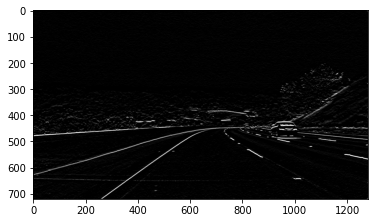

In [199]:
filtered_image = cv2.filter2D(curved_lane_grayscale, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')